# Загрузка библиотек и набора данных DIAMONDS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
! gdown 1l8KI5VWerXlKzrRpjvxEqqS4gNbGVyxO

Downloading...
From: https://drive.google.com/uc?id=1l8KI5VWerXlKzrRpjvxEqqS4gNbGVyxO
To: /content/diamonds.csv
100% 3.19M/3.19M [00:00<00:00, 140MB/s]


In [3]:
df = pd.read_csv('/content/diamonds.csv')

#Описание набора данных:

---







Набор данных содержит цены и атрибуты 53 940 бриллиантов

1. carat - вес бриллианта.
2. cut - качество огранки бриллианта  Fair < Good < Very Good < Premium < Ideal
3. color - цвет бриллианта (D - наилучший)  J < I < H < G < F < E < D
4. clarity - чистота бриллианта (IF - наилучший) I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF
5. depth - высота бриллианта, измеренная от culet до table, деленная на его средний диаметр пояcа.
6. table - ширина площадки бриллианта, выраженная в процентах от его среднего диаметра.
7. price - цена, $ 
8. х - длина,мм
9. у - ширина, мм
10. z - глубина,мм


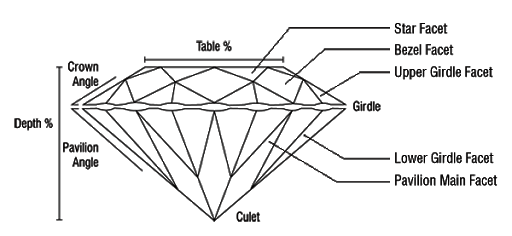

Задача: предсказать стоимость бриллиантов (price), основываясь на представленном наборе данных 

# EDA (разведочный анализ) и подготовка данных

In [4]:
#посмотрим на данные
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Можно видеть, что в данных есть три категориальные переменные, остальные числовые.

In [6]:
#столбец с индексами нам не нужен, исключаем из рассмотрения
df = df.drop(labels = 'Unnamed: 0', axis=1)

In [7]:
# проверяем пустые значения в переменных
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
#переименуем некоторые столбцы для удобства восприятия
df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth_%", "table": "table_%"},inplace = True)
df.head(5)

,carat,cut,color,clarity,depth_%,table_%,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
#описательная статистика
#рассмотрим статистику по числовым параметрам
df.describe()

,carat,depth_%,table_%,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Можно видеть, что в столбцах  length, width и depth встречаются значения, равные 0, что являетя недопустимым (размер алмаза не может быть разным нулю). Посмотрим на эти строки в датасете.

In [10]:
df.loc[(df['length'] == 0) | (df['width'] == 0) | (df['depth'] == 0)]

,carat,cut,color,clarity,depth_%,table_%,price,length,width,depth
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [11]:
#оставляем только значения, не равные нулю
df = df.loc[(df[['length', 'width', 'depth']] !=0).all(axis = 1)]
df.shape

(53920, 10)

In [12]:
# проверяем наличие  нулевых (недопустимых) значений в размерах алмазов
df.loc[(df['length'] == 0) | (df['width'] == 0) | (df['depth'] == 0)]

,carat,cut,color,clarity,depth_%,table_%,price,length,width,depth


In [13]:
#переведем категориальные параметры в числовые
df['clarity_score'] = df['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[8,7,6,5,4,3,2,1])
df['color_score'] = df['color'].replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
df['cut_score'] = df['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[5,4,3,2,1])
df = df.drop(columns=['clarity', 'color', 'cut'])
df.head()

,carat,depth_%,table_%,price,length,width,depth,clarity_score,color_score,cut_score
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,6,5
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,6,4
2,0.23,56.9,65.0,327,4.05,4.07,2.31,5,6,2
3,0.29,62.4,58.0,334,4.20,4.23,2.63,4,2,4
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,1,2


<Axes: >

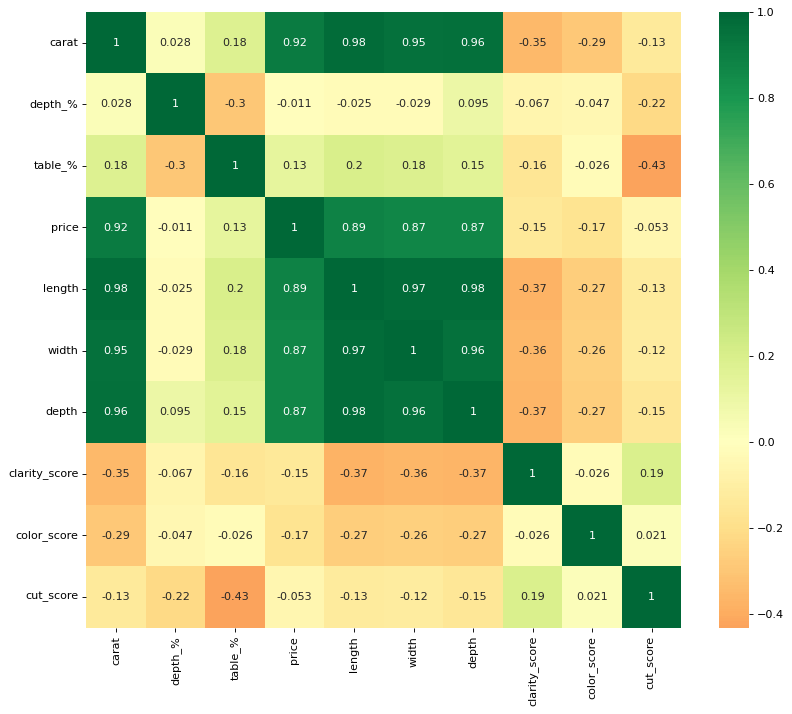

In [14]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

По корреляционной матрице видно, что между столбцами carat, price, length, width и	depth есть высокая положительная корреляция (каждого с каждым).
Другими словами, вес алмаза (карат) взаимосвязан с его размерами, и все это влияет на цену. При этом чистота алмаза, параметры и качество огранки, а также цвет не показали связи с ценой.

Поскольку каратность бриллианта вычисляется по формуле, в которой фигурируют его размеры, умноженные на коэффициент огранки, то это объясняет высокие коэффициенты корреляции между данными столбцами. Для исключения мультиколлинеарности и переобучения модели удалим три столбца с размерами, и оставим столбец carat

In [15]:
df = df.drop(columns=['length', 'width', 'depth'])

In [16]:
df.head()

,carat,depth_%,table_%,price,clarity_score,color_score,cut_score
0,0.23,61.5,55.0,326,2,6,5
1,0.21,59.8,61.0,326,3,6,4
2,0.23,56.9,65.0,327,5,6,2
3,0.29,62.4,58.0,334,4,2,4
4,0.31,63.3,58.0,335,2,1,2


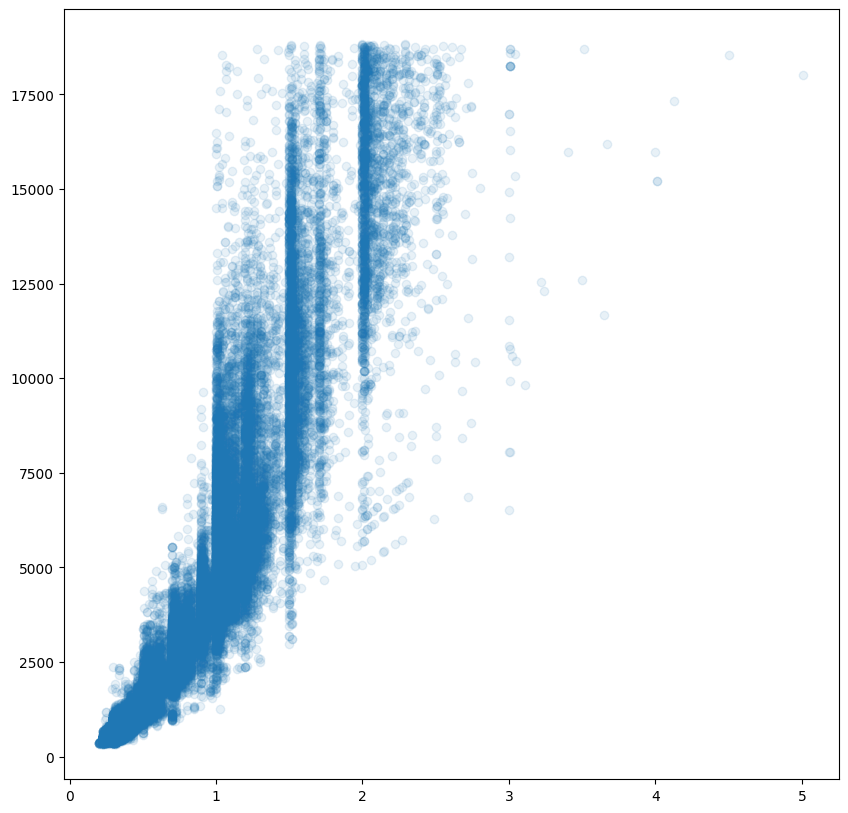

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter(x='carat', y='price', data=df, alpha=0.1)
plt.show()

Есть определенная маркетинговая формула расчета цены бриллианта в зависимости от каратности, которая действует до 5 карат. Выше 5 карат бриллианты редкие, и цена на них устанавливается не стандартными расчетами, а в зависимости от уникальности камня. 

В нашем датасете только один камень весит 5 карат, остальные меньше, соответственно, можно считать, что данные вполне однородные, без уникальных камней, которые выбивались бы из общих закономерностей. Датасет представляет собой масс-маркетовые бриллианты, включая крупные и дорогие, но без редких эксклюзивных камней. 

In [18]:
df.describe()

,carat,depth_%,table_%,price,clarity_score,color_score,cut_score
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,4.051502,4.405972,3.904228
std,0.473795,1.432331,2.234064,3987.280446,1.647005,1.701272,1.116579
min,0.200000,43.000000,43.000000,326.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,3.000000,3.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,4.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,5323.250000,5.000000,6.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,8.000000,7.000000,5.000000


<Axes: >

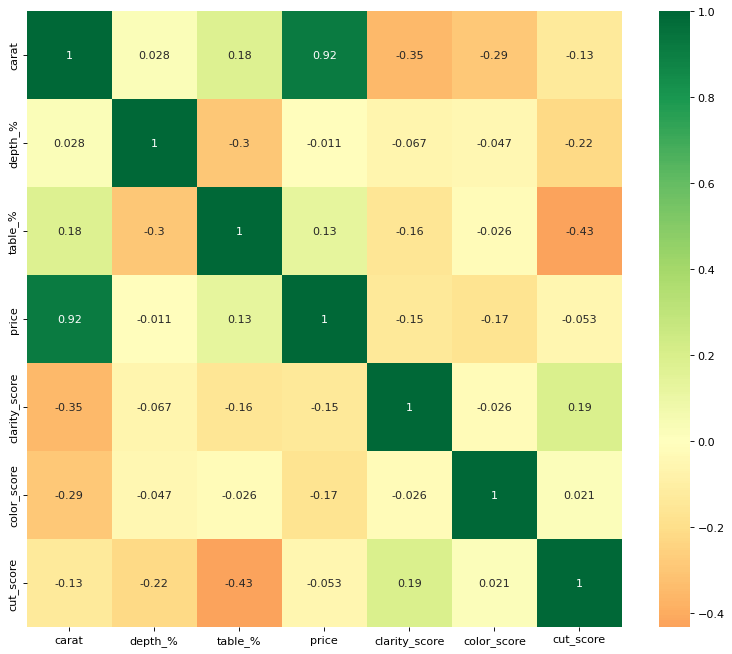

In [19]:
# Построим корреляционную матрицу без учета удаленныз столбцов
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Sklearn. Линейная регрессия

In [20]:
!pip install catboost-q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.3 MB/s eta 0:00:00


In [21]:
# Импортируем необходимые для изучения модели
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [22]:
X = df.drop(['price'],axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [23]:
# Ицициализируеам необходимые модели
LR = LinearRegression()
RFC = RandomForestRegressor(n_estimators=12)
GBM = GradientBoostingRegressor()
LGBMC = LGBMRegressor()
XGB = XGBRegressor(objective='reg:squarederror')
CB = CatBoostRegressor(verbose=0, n_estimators=50)

In [24]:
# Модели соберем в списке
models = [LR, RFC, GBM, LGBMC, XGB, CB]
names_of_models = ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor', 
                   'LGBMRegressor', 'XGBRegressor', 'CatBoostRegressor']

In [25]:
# Пееребирая модели из списка, выведем на экран процент успешных предсказаний модели
for i in range(len(models)):
  models[i].fit(X_train, y_train)
  predict = models[i].predict(X_test)
  print(f'Модель: {names_of_models[i]} выдала {round((((mean_absolute_error(y_test, predict)) / df.price.mean()) * 100), 2)} процента точных предсказаний')

Модель: LinearRegression выдала 21.87 процента точных предсказаний
Модель: RandomForestRegressor выдала 7.46 процента точных предсказаний
Модель: GradientBoostingRegressor выдала 8.88 процента точных предсказаний
Модель: LGBMRegressor выдала 7.09 процента точных предсказаний
Модель: XGBRegressor выдала 7.01 процента точных предсказаний
Модель: CatBoostRegressor выдала 7.59 процента точных предсказаний


<ipython-input-26-6e3990f78600>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns)


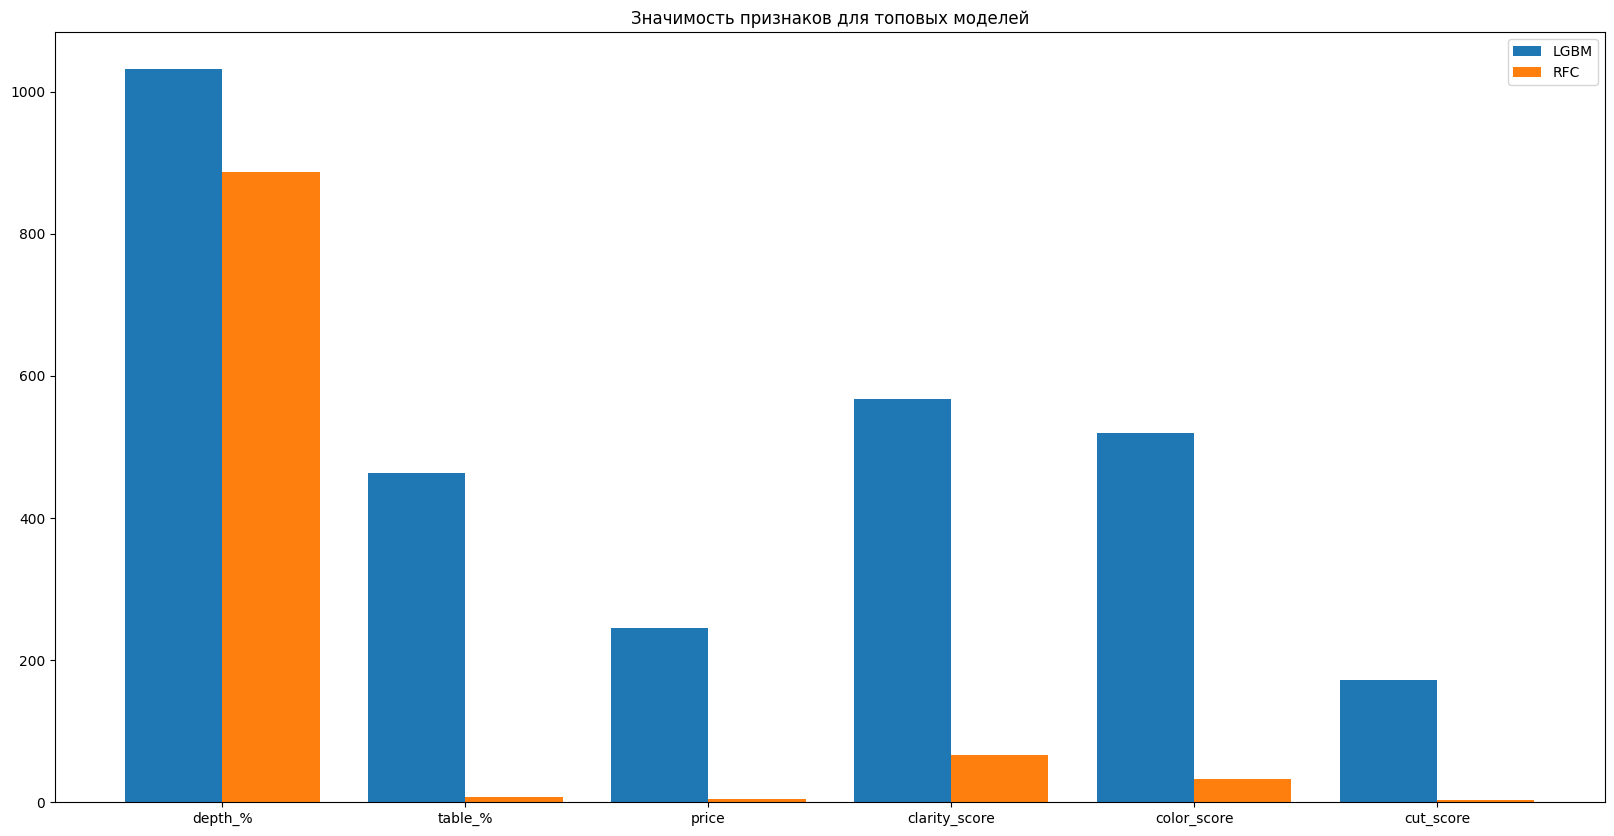

In [26]:
fig, ax = plt.subplots()
x1 = np.arange(1, 7) - 0.2
x2 = np.arange(1, 7) + 0.2
ax.bar(x1, LGBMC.feature_importances_, width = 0.4, label='LGBM')
ax.bar(x2, RFC.feature_importances_ * 1000, width = 0.4, label='RFC')
ax.set_xticklabels(df.columns)
ax.set_title('Значимость признаков для топовых моделей')
fig.set_figwidth(20) 
fig.set_figheight(10) 
ax.legend()